In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train_data.txt
/kaggle/input/test_data.txt


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_dataframe = pd.read_csv('../input/train_data.txt',sep=',',header=None)

In [4]:
train_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,...,187.576,160,159,0.006065,0.000416,0.000,0,0.000,23,1
1,1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,...,234.505,170,169,0.005181,0.000403,2.247,0,0.000,23,1
2,1,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,...,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,23,1
3,1,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,...,220.230,94,92,0.004910,0.000320,0.000,0,0.000,23,1
4,1,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,...,225.162,117,114,0.004757,0.000380,18.182,1,13.318,23,1


In [5]:
# taking only the valid features as given instructions from the website
x_train=train_dataframe.iloc[:,1:27]

In [6]:
x_train.head() 

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,10.421,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,14.773,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,12.981,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,10.853,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,11.499,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318


In [7]:
y_train =train_dataframe.iloc[:,-1]

In [8]:
test_dataframe = pd.read_csv('../input/test_data.txt',sep=',',header=None)

In [9]:
test_dataframe.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,...,184.502,187.880,183.0,182.0,0.005368,0.000025,0.0,0.0,0.0,1
1,1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,...,198.665,202.214,194.0,193.0,0.004988,0.000020,0.0,0.0,0.0,1
2,1,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,...,197.220,206.060,198.0,197.0,0.004940,0.000046,0.0,0.0,0.0,1
3,1,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,...,202.324,206.182,200.0,199.0,0.004900,0.000023,0.0,0.0,0.0,1
4,1,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,...,205.407,209.927,204.0,203.0,0.004820,0.000022,0.0,0.0,0.0,1


In [10]:
# taking the valid features
x_test = test_dataframe.iloc[:,1:27]
y_test = test_dataframe.iloc[:,-1]

In [11]:
x_test.head()

,1,2,3,4,5,6,7,8,9,10,...,17,18,19,20,21,22,23,24,25,26
0,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,1.576,...,0.859,184.502,187.880,183.0,182.0,0.005368,0.000025,0.0,0.0,0.0
1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,...,0.755,198.665,202.214,194.0,193.0,0.004988,0.000020,0.0,0.0,0.0
2,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,1.017,...,1.860,197.220,206.060,198.0,197.0,0.004940,0.000046,0.0,0.0,0.0
3,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,0.823,...,0.931,202.324,206.182,200.0,199.0,0.004900,0.000023,0.0,0.0,0.0
4,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,0.777,...,0.880,205.407,209.927,204.0,203.0,0.004820,0.000022,0.0,0.0,0.0


In [12]:
#here i tried stnadardisation not normalisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()


In [13]:
feat_x_train= sc.fit_transform(x_train)
feat_x_test = sc.transform(x_test)

# helper function

In [14]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import f1_score

In [15]:
def train_classifier(clf,X_train,y_train):
    clf.fit(X_train,y_train)

def predict_labels(clf,features,target,name):
    
    y_pred = clf.predict(features)
    cm = confusion_matrix(target.values,y_pred)
    print(cm)
    score= accuracy_score(target.values,y_pred)
    print("Accuracy on {} set {}".format(name,score))
    return f1_score(target.values,y_pred,pos_label=1)
def train_predict(clf,X_train,y_train,X_test,y_test):
    
    train_classifier(clf,X_train,y_train)
    print("F1 score for training set: {:.4f}".format(predict_labels(clf,X_train,y_train,'Train')))
    print("F1 score for test set: {:.4f}".format(predict_labels(clf,X_test,y_test,'Test')))

# Naive Bayes

In [16]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [17]:
print("Naive Bayes ")
train_predict(clf,feat_x_train,y_train,feat_x_test,y_test)

Naive Bayes 
[[227 293]
 [125 395]]
Accuracy on Train set 0.5980769230769231
F1 score for training set: 0.6540
[[  0   0]
 [132  36]]
Accuracy on Test set 0.21428571428571427
F1 score for test set: 0.3529


# Random Forest

In [18]:
from sklearn.ensemble import RandomForestClassifier
classifierRand = RandomForestClassifier(n_estimators=25,criterion='entropy',random_state=25)
train_predict(classifierRand,feat_x_train,y_train,feat_x_test,y_test)

[[520   0]
 [  0 520]]
Accuracy on Train set 1.0
F1 score for training set: 1.0000
[[ 0  0]
 [72 96]]
Accuracy on Test set 0.5714285714285714
F1 score for test set: 0.7273


# Ploting CM

In [19]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

Naive Bayes
On Training
[[227 293]
 [125 395]]


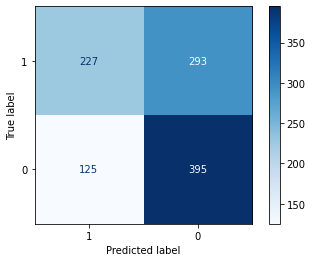

On Testing
[[  0   0]
 [132  36]]


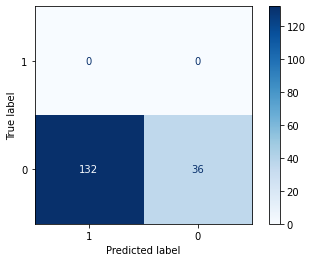

In [20]:
print("Naive Bayes")
class_names=[1,0]
print("On Training")
disp = plot_confusion_matrix(clf, feat_x_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
print(disp.confusion_matrix)
plt.show()
print("On Testing")
disp = plot_confusion_matrix(clf, feat_x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
print(disp.confusion_matrix)
plt.show()

Randomfores
On Training
[[520   0]
 [  0 520]]


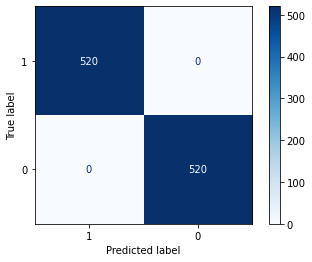

On Testing
[[ 0  0]
 [72 96]]


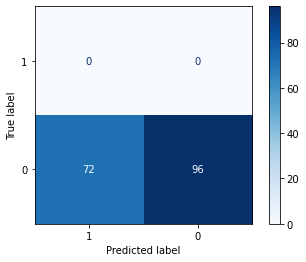

In [21]:
print("Randomfores")
class_names=[1,0]
print("On Training")
disp = plot_confusion_matrix(classifierRand, feat_x_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
print(disp.confusion_matrix)
plt.show()
print("On Testing")
disp = plot_confusion_matrix(classifierRand, feat_x_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 )
print(disp.confusion_matrix)
plt.show()